## Intersection of Polygons
---
### Xiaomeng

In [1]:
%matplotlib inline
from __future__ import print_function, division
import pandas as pd
import geopandas as gpd
import os
from matplotlib.pylab import plt
from fiona.crs import from_epsg

### 1. Reading the datasets of different boundaries.

In [2]:
# PUMA

filepath = '/Users/DXM/Documents/ARGO/ops'
puma = gpd.read_file(filepath + '/cb_2016_06_puma10_500k/cb_2016_06_puma10_500k.shp')
puma = puma.to_crs(epsg=4269)
pu = gpd.GeoDataFrame(puma)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Public Use Microdata Areas')

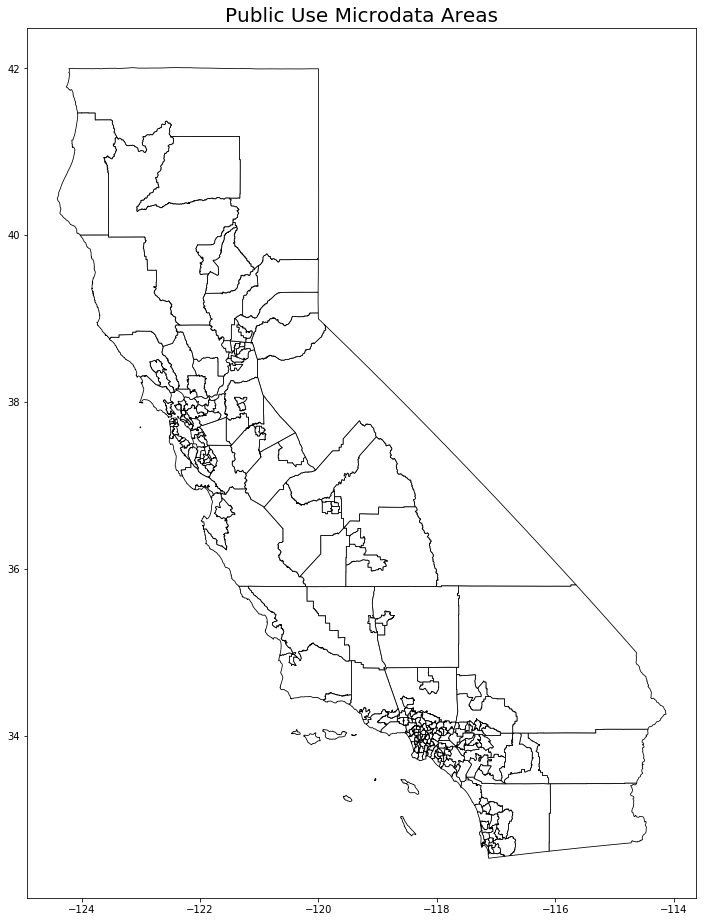

In [3]:
fig, ax = plt.subplots(figsize=(12,16))
pu.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Public Use Microdata Areas', fontsize=20)

In [4]:
# LAcounty_COMMUNITIES

community = gpd.read_file(filepath + '/Communities1/Communities.shp')
community = community.to_crs(epsg=4269)
co = gpd.GeoDataFrame(community)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Community Boundaries of LA County')

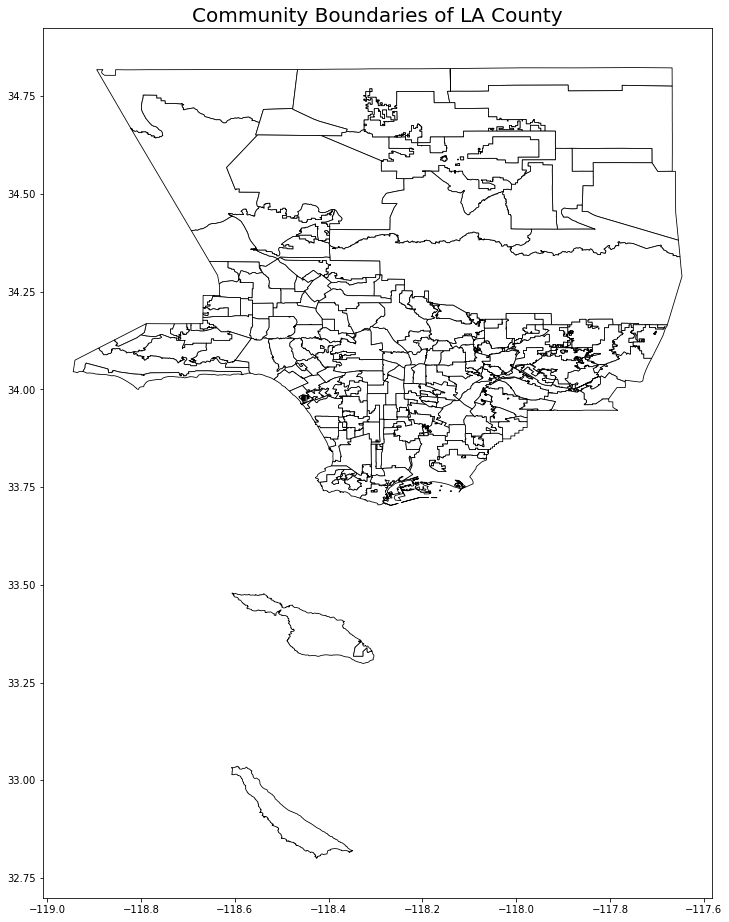

In [5]:
fig, ax = plt.subplots(figsize=(12,16))
co.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Community Boundaries of LA County', fontsize=20)

In [6]:
#LA County TOWN_COUNCILS

council = gpd.read_file(filepath + '/DRP_TOWN_COUNCIL_AREAS/DRP_TOWN_COUNCIL_AREAS.shp')
council = council.to_crs(epsg=4269)
cl = gpd.GeoDataFrame(council) 

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Council Boundaries of LA County')

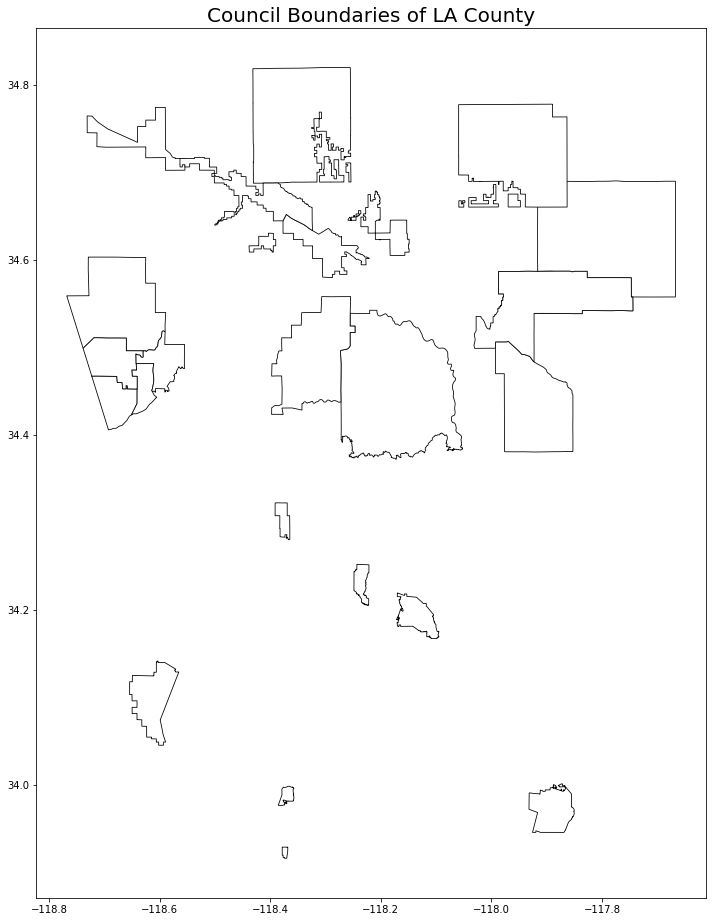

In [7]:
fig, ax = plt.subplots(figsize=(12,16))
cl.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Council Boundaries of LA County', fontsize=20)

In [8]:
# FIRE_DIVISION_BOUNDARIES

fire_division = gpd.read_file(filepath + '/FIRE_DIVISION_BOUNDARIES/FIRE_DIVISION_BOUNDARIES.shp')
fire_division= fire_division.to_crs(epsg=4269)
fr_di = gpd.GeoDataFrame(fire_division)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Fire Division Boundaries of LA C')

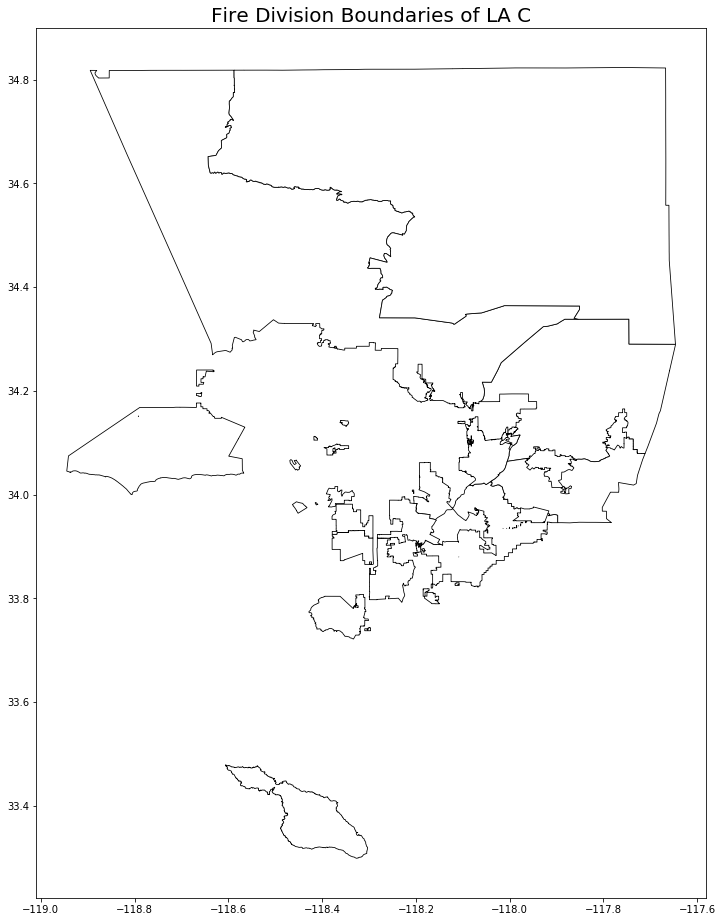

In [9]:
fig, ax = plt.subplots(figsize=(12,16))
fr_di.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Fire Division Boundaries of LA C', fontsize=20)

In [10]:
# FIRE_BATTALION_BOUNDARIES

fire_battalion = gpd.read_file(filepath + '/FIRE_BATTALION_BOUNDARIES/FIRE_BATTALION_BOUNDARIES.shp')
fire_battalion = fire_battalion.to_crs(epsg=4269)
fr_ba = gpd.GeoDataFrame(fire_battalion)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Fire Battalion Boundaries of LA County')

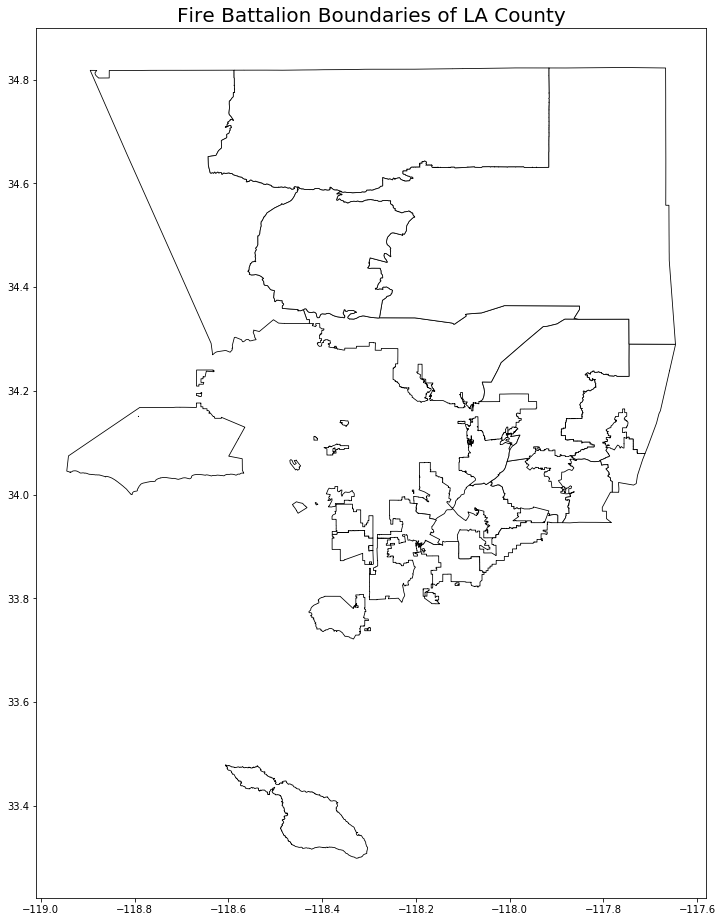

In [11]:
fig, ax = plt.subplots(figsize=(12,16))
fr_ba.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Fire Battalion Boundaries of LA County', fontsize=20)

### 2. Interceptions of Polygons

In [12]:
from spatial_overlays import spatial_overlays

In [13]:
pu_co = spatial_overlays(pu, co, how='intersection', reproject=True)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


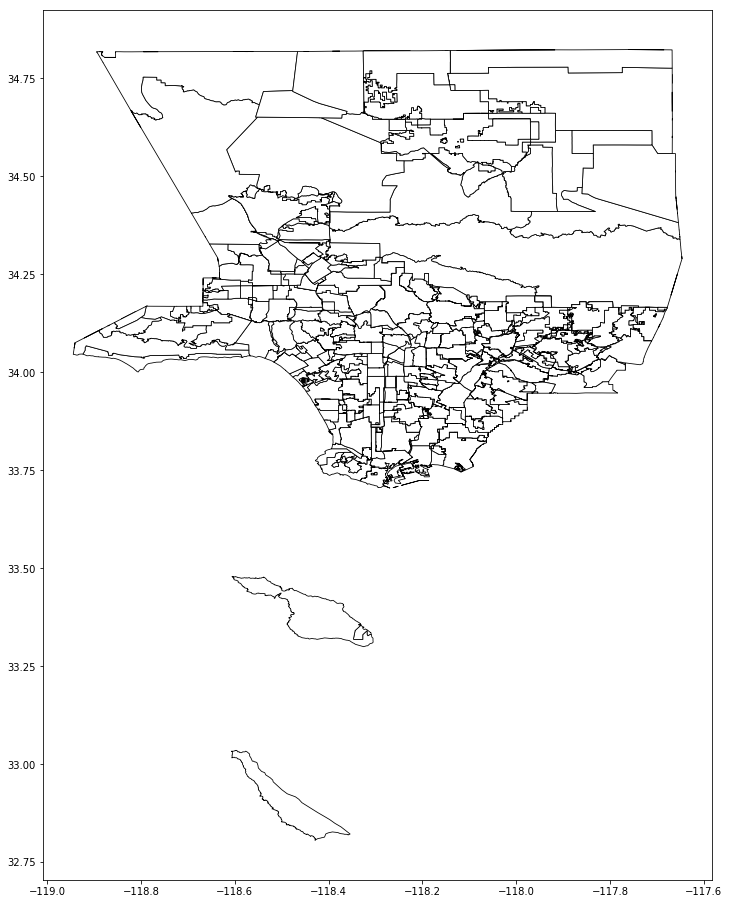

In [14]:
fig, ax = plt.subplots(figsize=(12,16))
pu_co.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')

In [15]:
cl = pd.concat([cl, fr_ba], ignore_index=True)

In [16]:
pu_co_cl = spatial_overlays(pu_co, cl, how='intersection', reproject=True)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Mixed Boundaries of LA County')

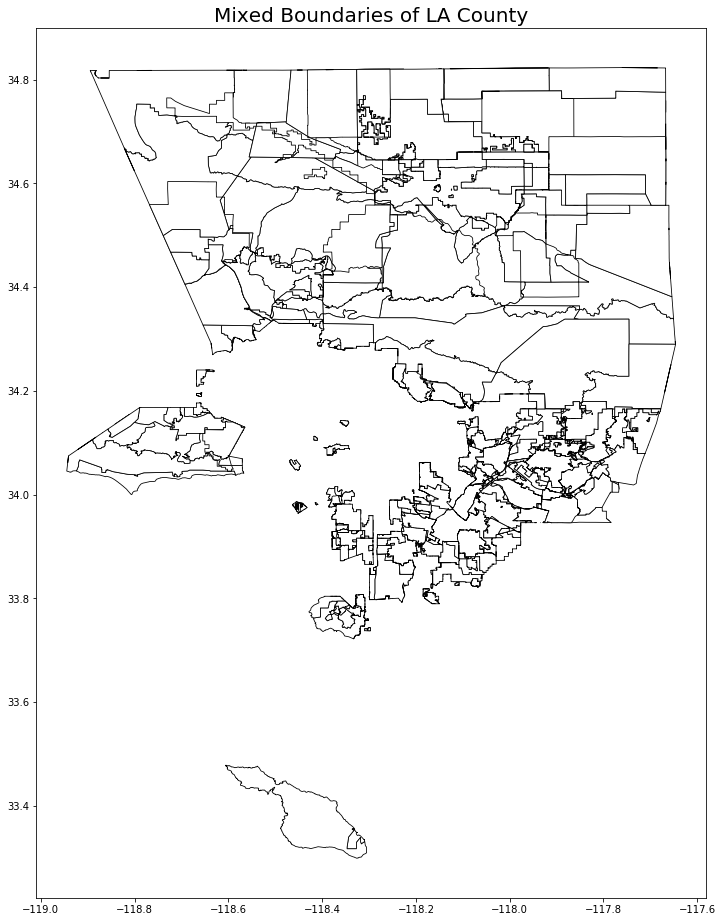

In [17]:
fig, ax = plt.subplots(figsize=(12,16))
pu_co_cl.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Mixed Boundaries of LA County', fontsize=20)

In [ ]:
fr = spatial_overlays(fr_di, fr_ba, how='intersection', reproject=True)

In [ ]:
fig, ax = plt.subplots(figsize=(12,16))
fr.plot(color = 'blue', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
pu_co_cl.plot(color = 'white', linewidth=0.8, alpha=0.2, axes=ax, edgecolor = 'r')
ax.set_title('Intersection Fire Boundaries of LA County', fontsize=20)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


In [49]:
intersection = spatial_overlays(pu_co_cl, fr, how='intersection', reproject=True)

/Users/DXM/anaconda3/lib/python3.6/site-packages/geopandas/plotting.py:385: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


Text(0.5,1,'Intersection Boundaries of LA County')

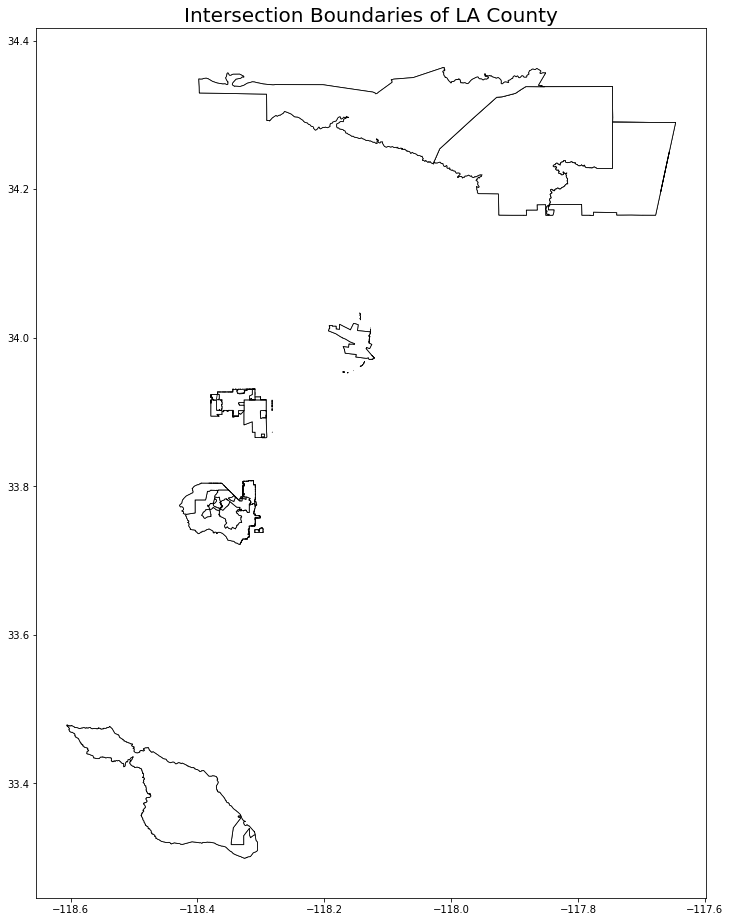

In [50]:
fig, ax = plt.subplots(figsize=(12,16))
intersection.plot(color = 'white', linewidth=0.8, alpha=1, axes=ax, edgecolor = 'k')
ax.set_title('Intersection Boundaries of LA County', fontsize=20)